<a href="https://colab.research.google.com/github/dkhiani6/CMPE-257-SJSU-Assignments/blob/main/Assignments/HW%205/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please read:


We have already defined the dataset below. And also have defined X_train and y_train. Please build a model and test it with X_test.

You should build a neural network model in Keras.

In [ ]:
from keras.datasets import mnist
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


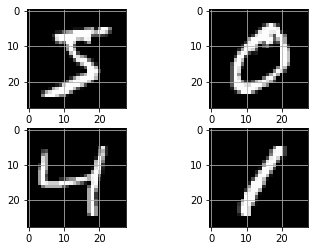

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

In [ ]:
# In the preceding code, we are importing the relevant Keras files and are also importing the MNIST dataset 
#(which is provided as a built-in dataset in Keras). 

# The MNIST dataset contains images of digits where the images are of 28 x 28 in shape. 
# You can see in the plots what they will look like.

In [ ]:
# 1. Import the relevant packages and datasets

In [ ]:
#2. Preprocess the targets (convert them into one-hot encoded vectors) so that we can perform optimization on top of them:
# We shall be minimizing categorical cross entropy loss

from sklearn import preprocessing
encoded = preprocessing.OneHotEncoder()

y_train = y_train.reshape(-1,1) 
y_test = y_test.reshape(-1,1)

encoded.fit(y_train)
y_train_en = encoded.transform(y_train).toarray()

encoded.fit(y_test)
y_test_en = encoded.transform(y_test).toarray()

img_size = 28*28
X_train = X_train.reshape(X_train.shape[0], img_size)
X_test = X_test.reshape(X_test.shape[0], img_size)

In [ ]:
#3. Initialize a model - 1 point

In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(28*28,)))
#model.add(Dense(units=10, activation='softmax')) # accuracy = 90%
model.add(Dense(units=10, activation='sigmoid')) # accuracy = 92%

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Define the model architecture:
Specify the number of units in a hidden layer Specify the activation function that is to be performed in a hidden layer Specify the number of hidden layers Specify the loss function that we want to minimize Provide the optimizer that will minimize the loss function

Number of units in hidden layer = 32

Number of hidden layers = 1

Activation function used in hidden layer = relu

Loss function to be minimized = categorical cross entropy

Optimizer used for minimization = ADAM 

In [ ]:
#5. Fit the model 

In [ ]:
print(X_train.shape)
print(y_train_en.shape)
model.fit(X_train, y_train_en, epochs=5, verbose=False)

(60000, 784)
(60000, 10)


In [ ]:
#6. Test the model
#7. Calculate the accuracy and loss values on top of the test dataset - 2 points

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train_en, verbose=False)
print("Training Accuracy : {:.2f}% and loss : {:.2f}%".format(accuracy*100,loss*100))
loss, accuracy = model.evaluate(X_test, y_test_en, verbose=False)
print("Testing Accuracy : {:.2f}% and loss : {:.2f}%".format(accuracy*100,loss*100))


Training Accuracy : 91.93% and loss : 31.52%
Testing Accuracy : 91.64% and loss : 36.50%
